In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',None)

import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Helper function to get dataframe metadata
def get_metadata(df):
    nulls = []
    cols = []
    dtypes = []
    unique = []
    data = {}
    for col, n, dtype in zip(df.columns,df.isnull().sum(),df.dtypes):
        cols.append(col)
        nulls.append(n)
        dtypes.append(dtype)
        unique.append(df[col].nunique())
    data = {"column_name":cols,"data_type":dtypes,"null_count":nulls,"unique_count":unique}
    return pd.DataFrame(data)

In [6]:
df_meta = get_metadata(df)
df_meta = df_meta.sort_values(by='null_count',ascending=False)
df_meta

,column_name,data_type,null_count,unique_count
72,PoolQC,object,1453,3
74,MiscFeature,object,1406,4
6,Alley,object,1369,2
73,Fence,object,1179,4
25,MasVnrType,object,872,3
57,FireplaceQu,object,690,5
3,LotFrontage,float64,259,110
59,GarageYrBlt,float64,81,97
64,GarageCond,object,81,5
58,GarageType,object,81,6


In [7]:
# Selecting columns with null values
df_nulls = df_meta[df_meta['null_count'] > 0]
df_nulls

,column_name,data_type,null_count,unique_count
72,PoolQC,object,1453,3
74,MiscFeature,object,1406,4
6,Alley,object,1369,2
73,Fence,object,1179,4
25,MasVnrType,object,872,3
57,FireplaceQu,object,690,5
3,LotFrontage,float64,259,110
59,GarageYrBlt,float64,81,97
64,GarageCond,object,81,5
58,GarageType,object,81,6


In [8]:
df_nulls['null_perc'] = (df_nulls['null_count']/len(df))*100
df_nulls

C:\Users\abhir\AppData\Local\Temp\ipykernel_18328\760838690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulls['null_perc'] = (df_nulls['null_count']/len(df))*100


,column_name,data_type,null_count,unique_count,null_perc
72,PoolQC,object,1453,3,99.520548
74,MiscFeature,object,1406,4,96.301370
6,Alley,object,1369,2,93.767123
73,Fence,object,1179,4,80.753425
25,MasVnrType,object,872,3,59.726027
57,FireplaceQu,object,690,5,47.260274
3,LotFrontage,float64,259,110,17.739726
59,GarageYrBlt,float64,81,97,5.547945
64,GarageCond,object,81,5,5.547945
58,GarageType,object,81,6,5.547945


In [9]:
# Removing all columns with more than 10% null values
cols_to_remove = df_nulls[df_nulls['null_perc'] >= 10]['column_name'].to_list()
cols_to_remove

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage']

In [10]:
cols_to_check = list(set(df_nulls['column_name'].to_list()) - set(cols_to_remove))
cols_to_check

['GarageYrBlt',
 'BsmtFinType1',
 'Electrical',
 'GarageQual',
 'GarageFinish',
 'BsmtCond',
 'BsmtExposure',
 'GarageCond',
 'GarageType',
 'BsmtFinType2',
 'MasVnrArea',
 'BsmtQual']

In [11]:
df.drop(cols_to_remove,axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [13]:
# Dropping rows with null values from the remaining columns
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [14]:
df.shape

(1338, 74)

In [15]:
# dropping Id column
df.drop('Id',axis=1,inplace=True)
df.shape

(1338, 73)

In [16]:
df_meta = get_metadata(df)

In [17]:
df_meta

,column_name,data_type,null_count,unique_count
0,MSSubClass,int64,0,15
1,MSZoning,object,0,5
2,LotArea,int64,0,1000
3,Street,object,0,2
4,LotShape,object,0,4
5,LandContour,object,0,4
6,Utilities,object,0,2
7,LotConfig,object,0,5
8,LandSlope,object,0,3
9,Neighborhood,object,0,25


In [18]:
cols_num = df_meta[df_meta['data_type'] != 'object']['column_name'].to_list()
len(cols_num)

36

In [19]:
cols_cat = list(set(df.columns)-set(cols_num))
cols_cat.append('SalePrice')
len(cols_cat)

38

In [20]:
df_num = df[cols_num]
df_cat = df[cols_cat]

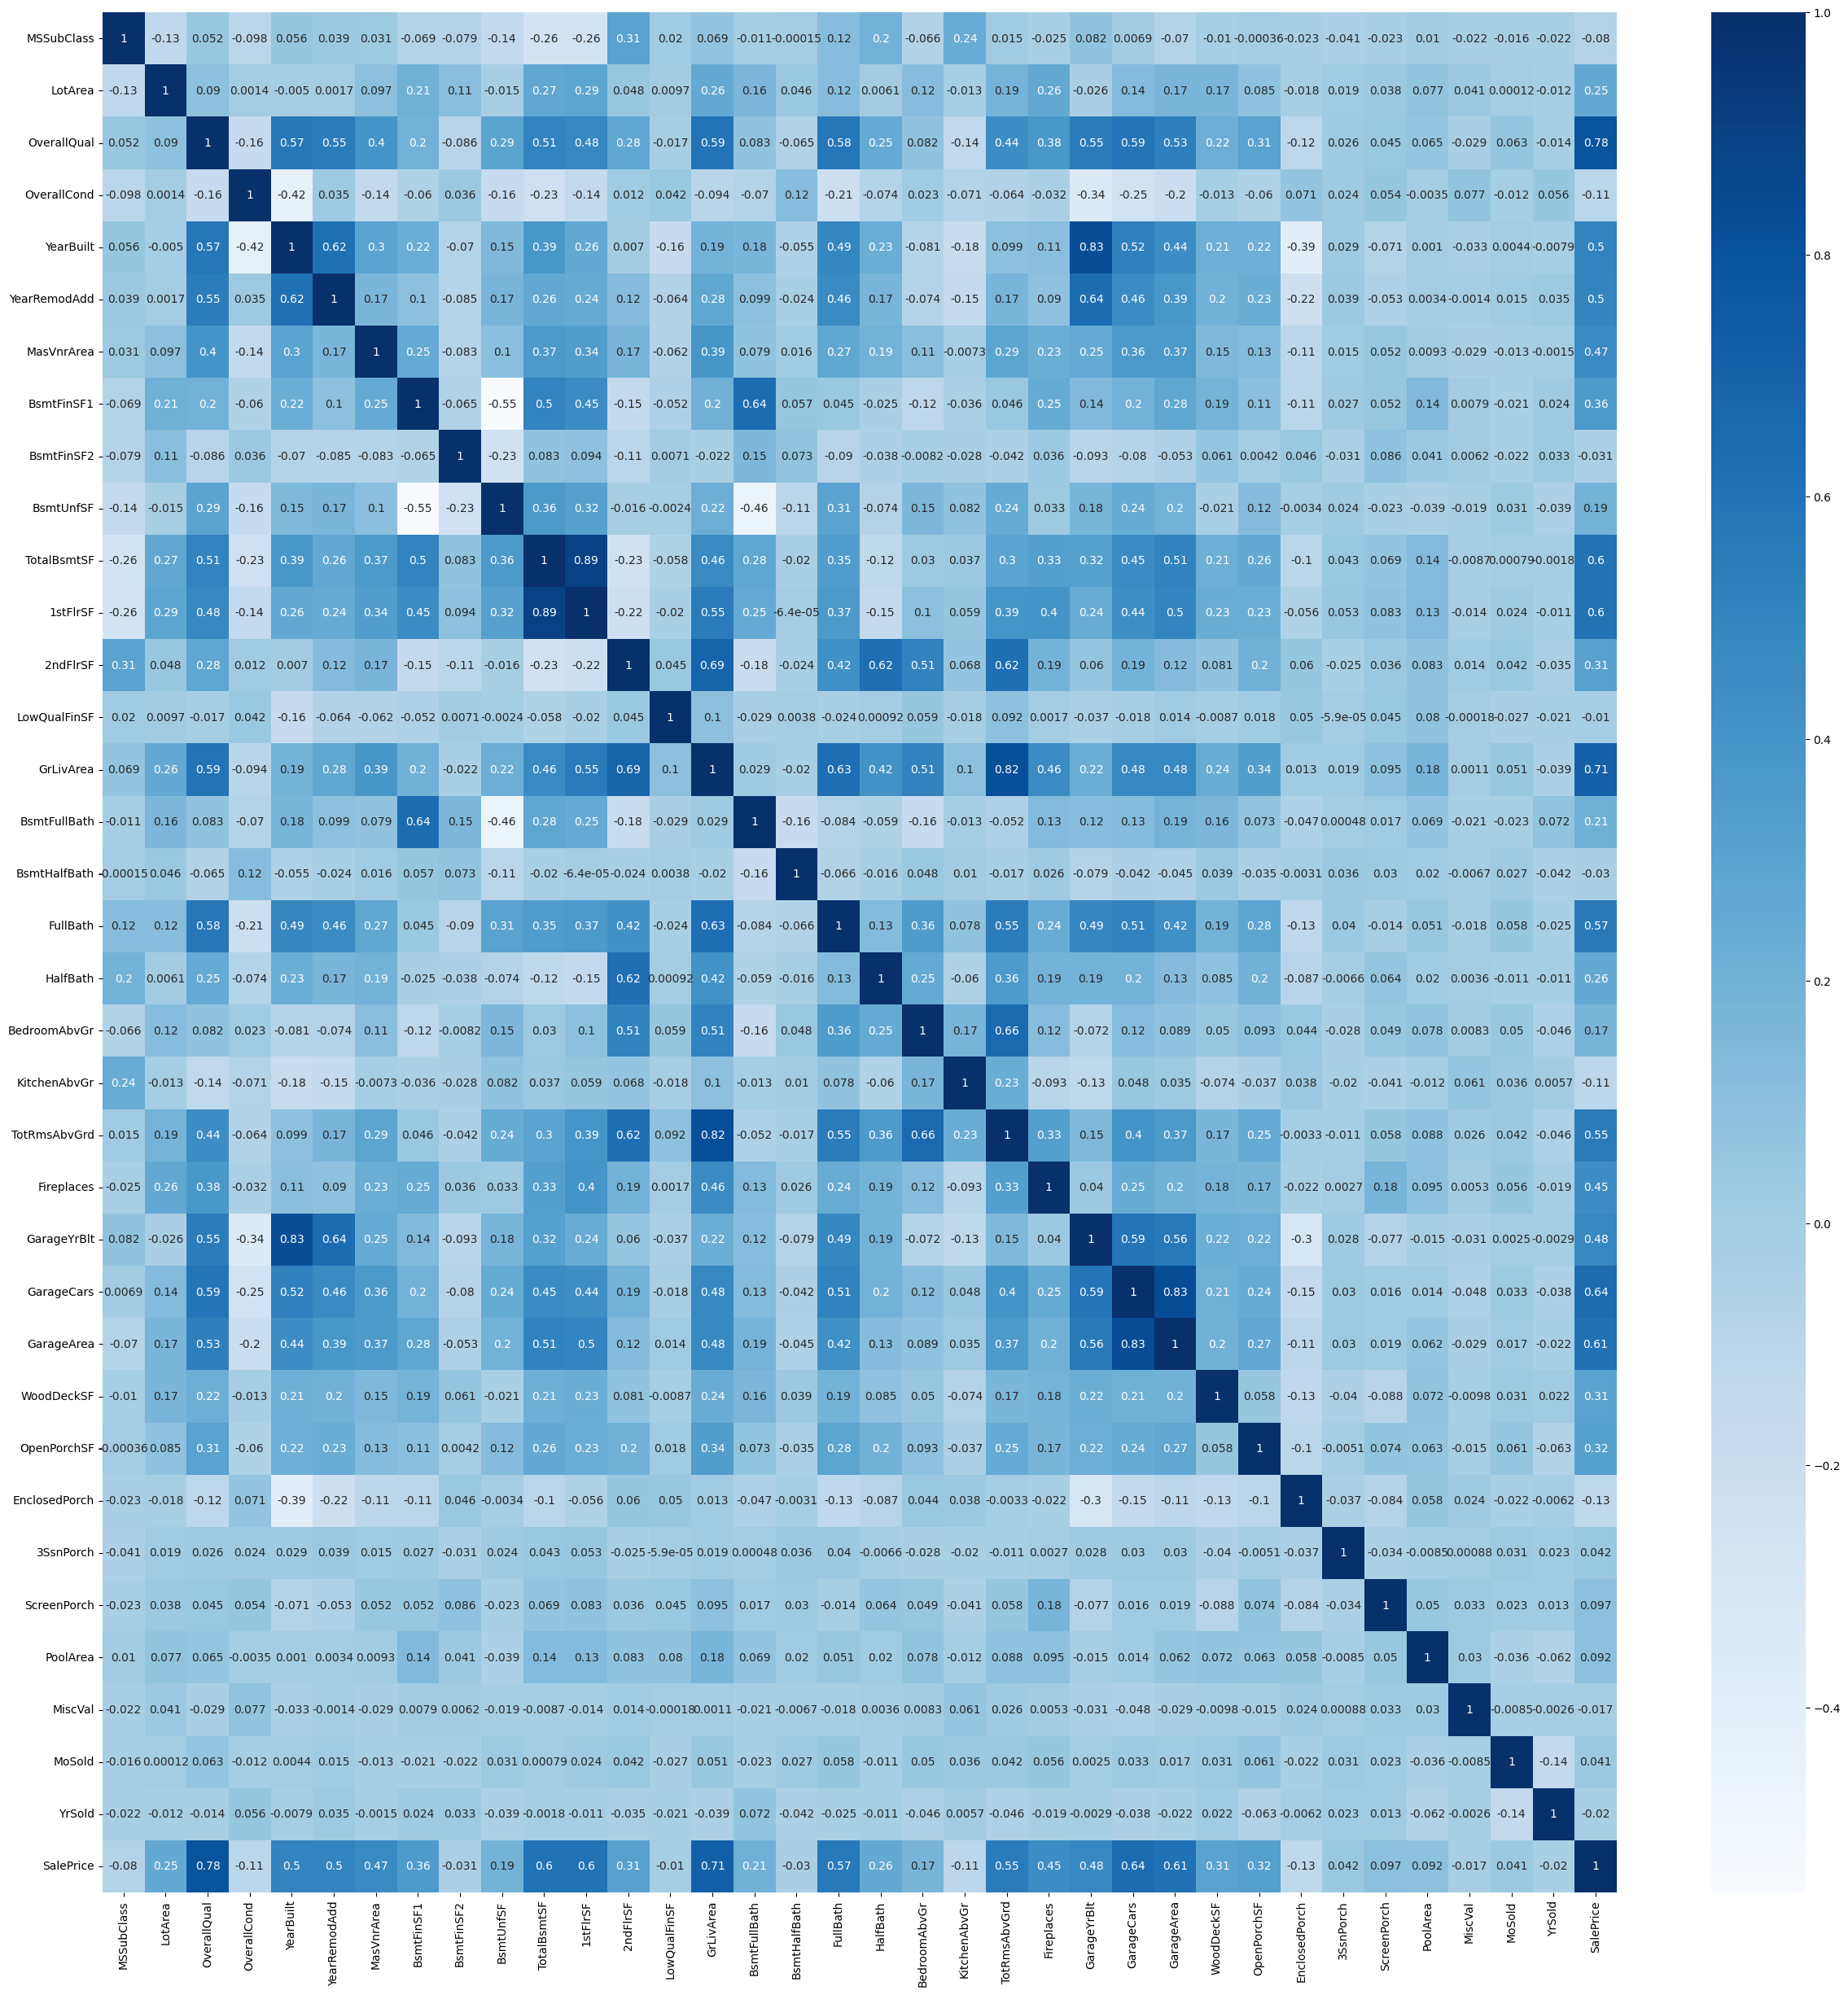

In [21]:
#inspecting numerical columns
plt.figure(figsize=(30,30))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)
plt.show()

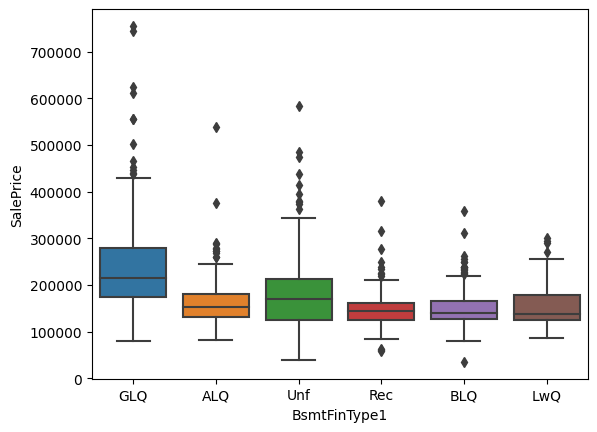

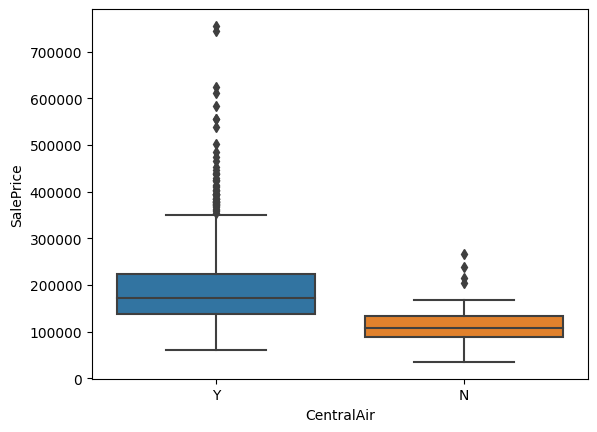

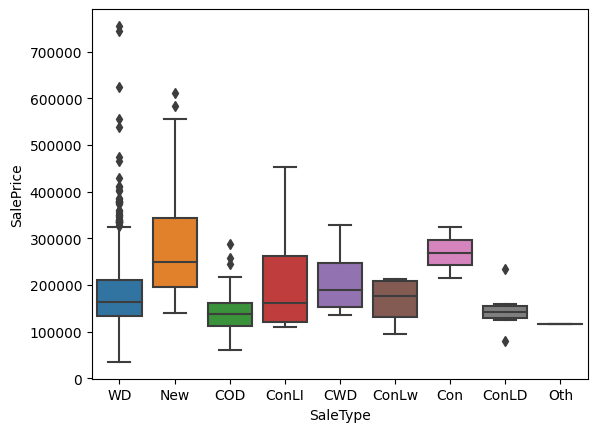

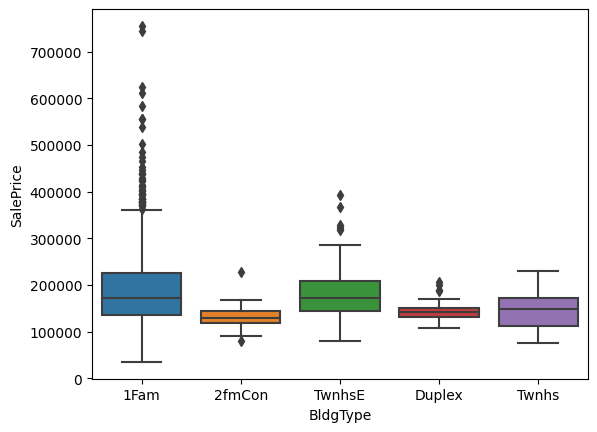

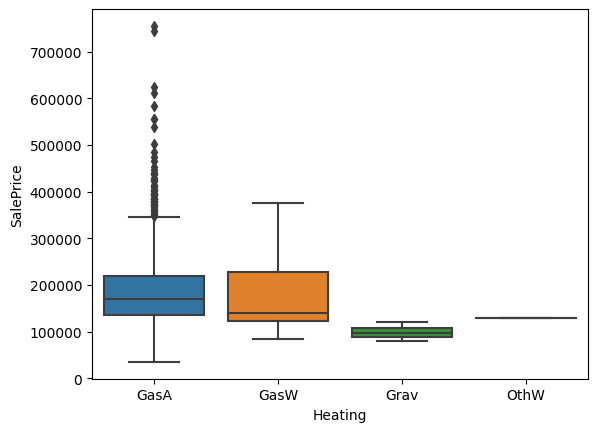

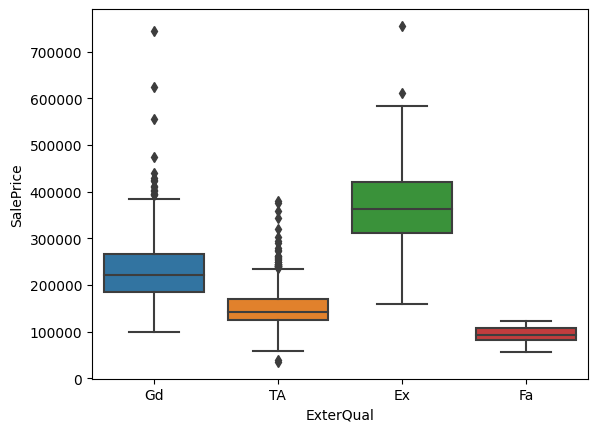

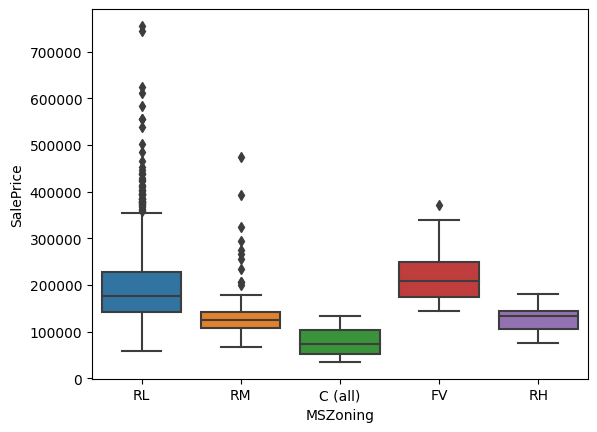

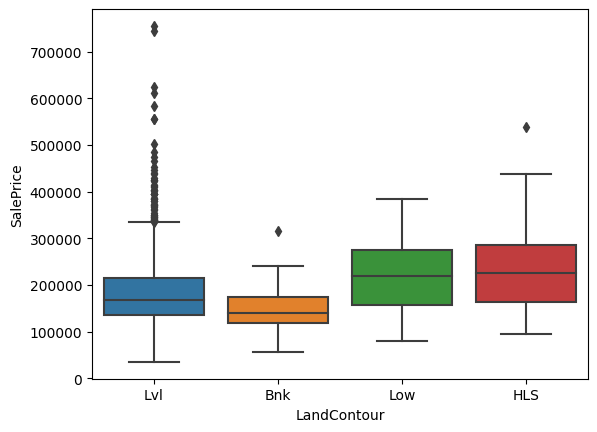

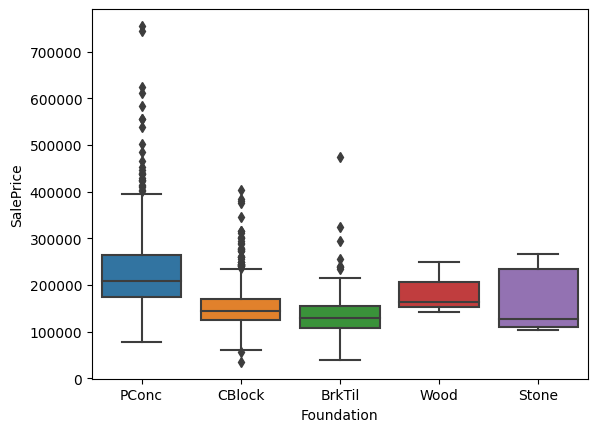

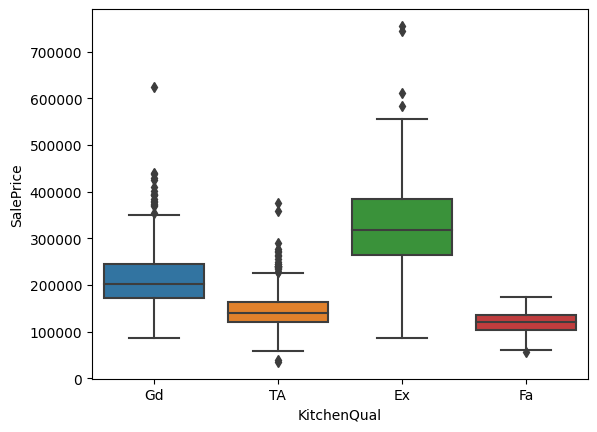

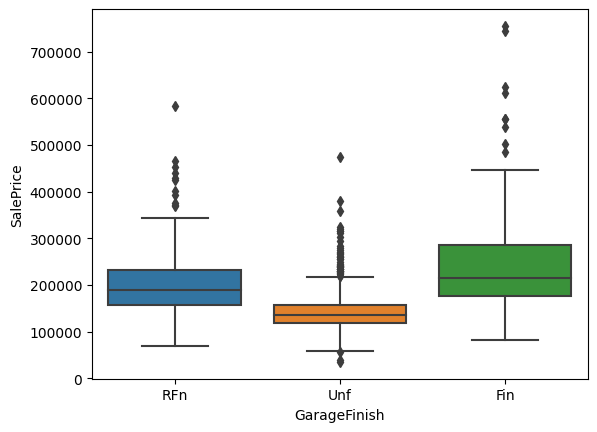

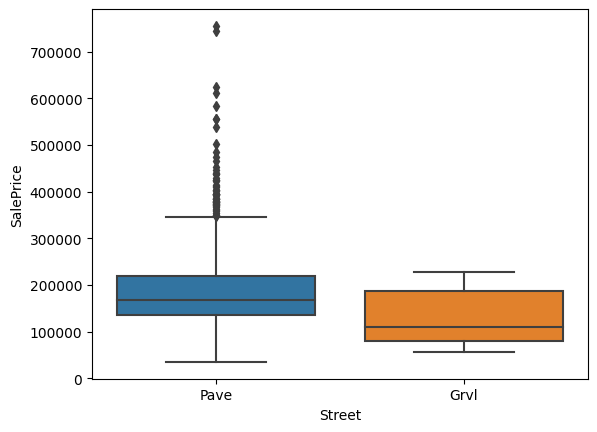

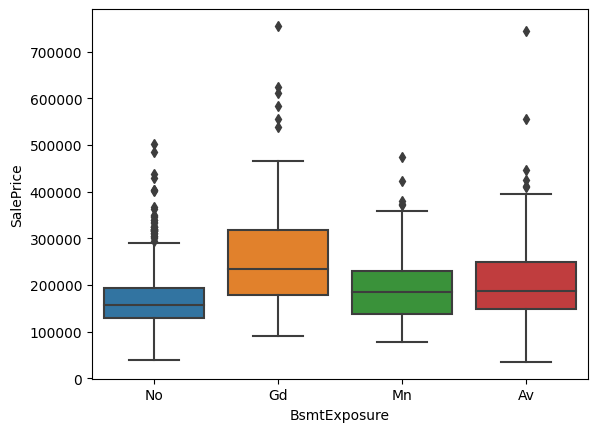

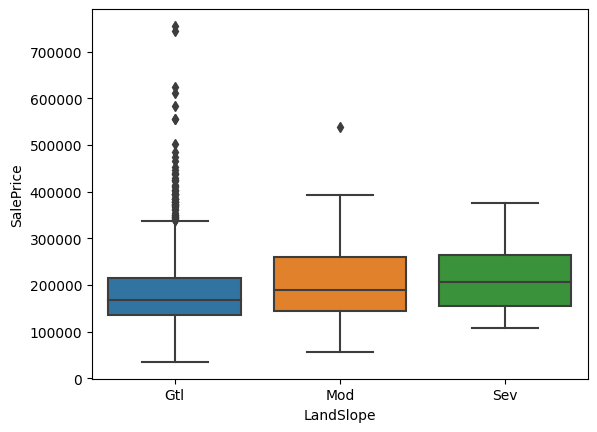

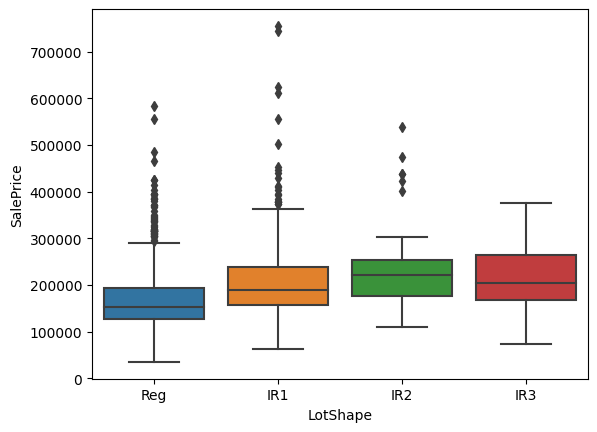

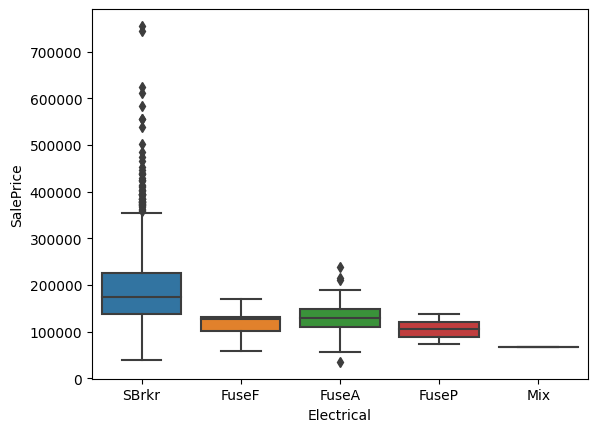

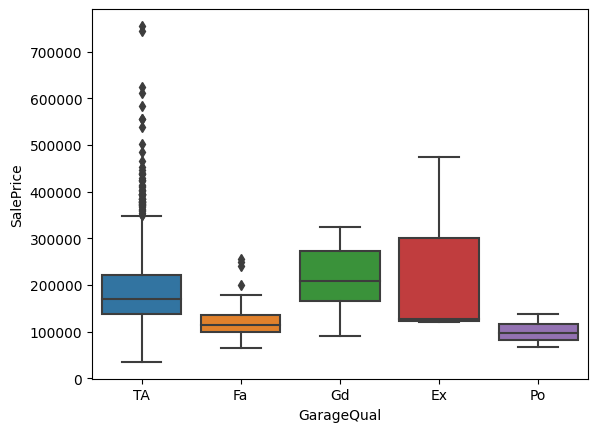

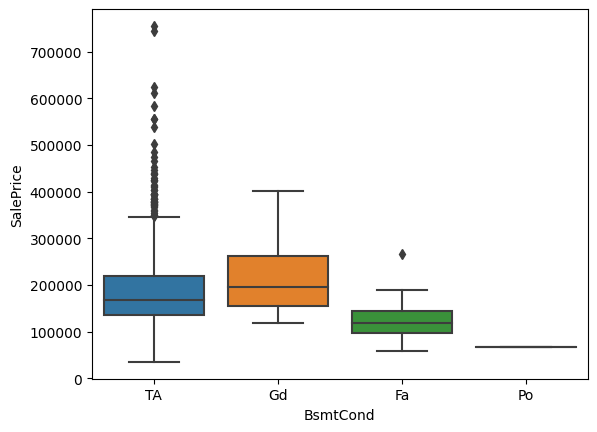

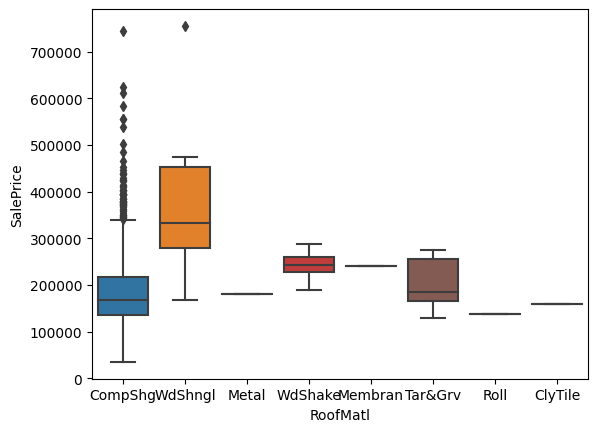

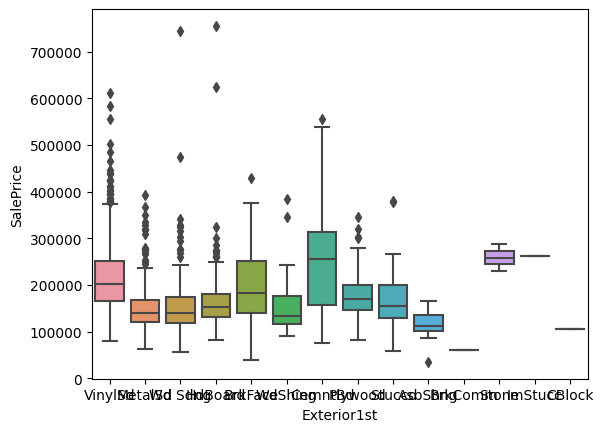

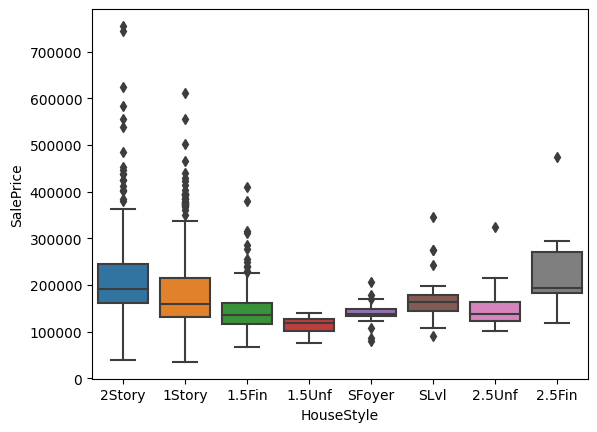

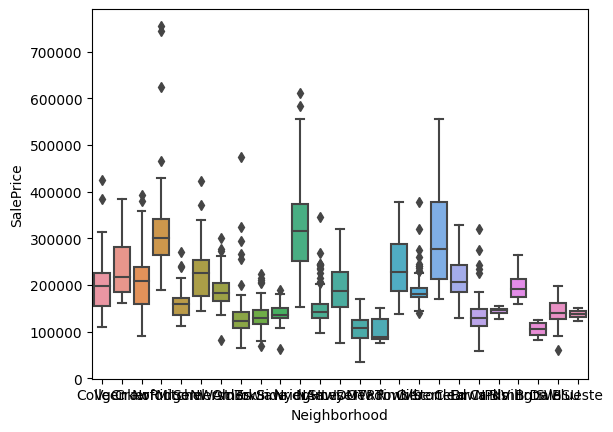

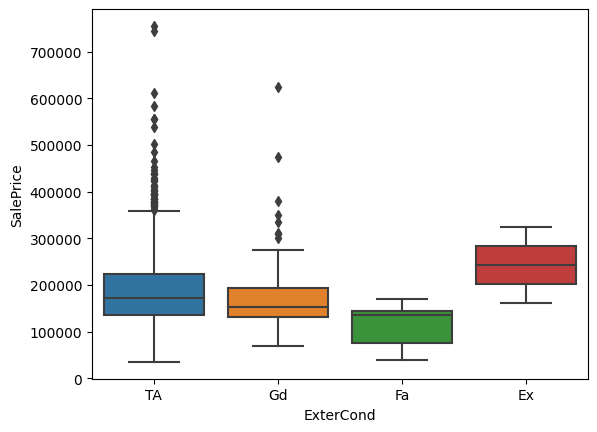

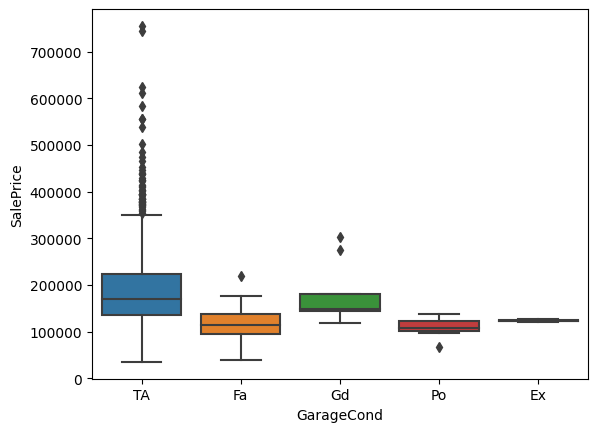

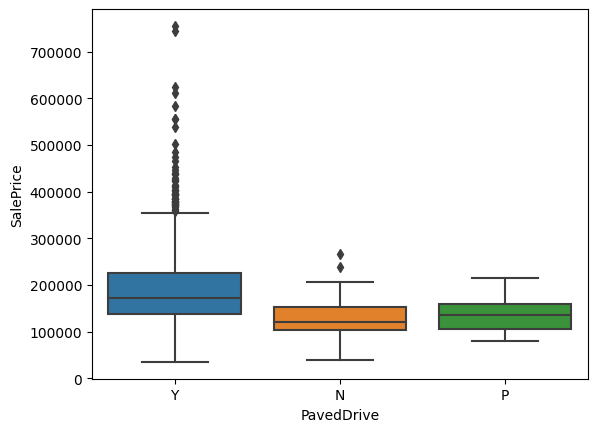

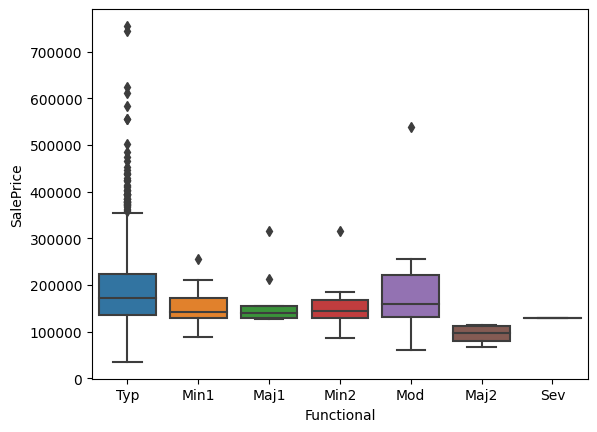

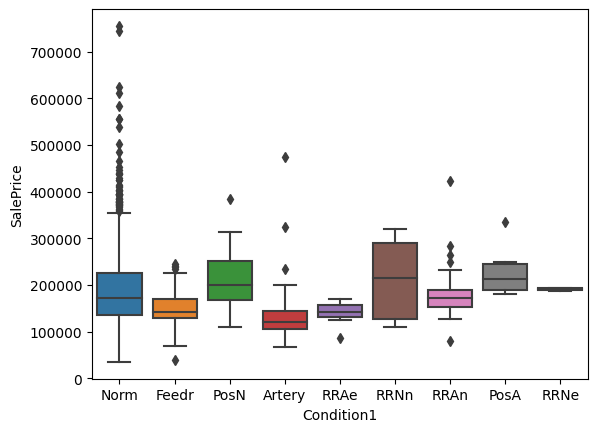

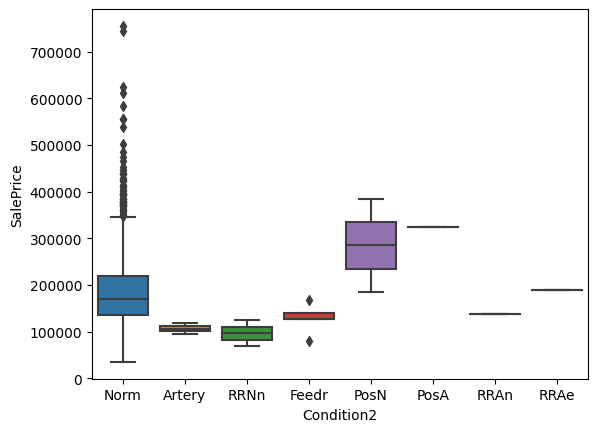

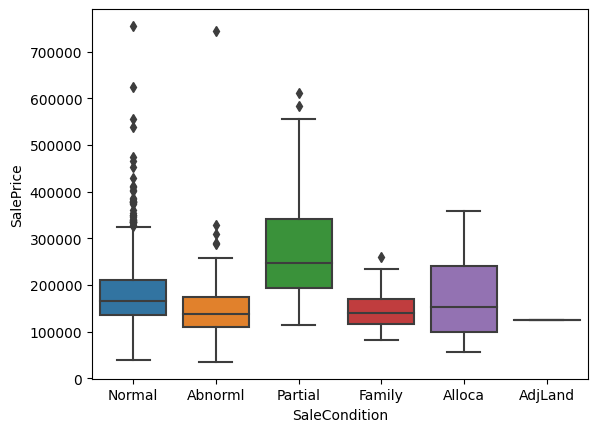

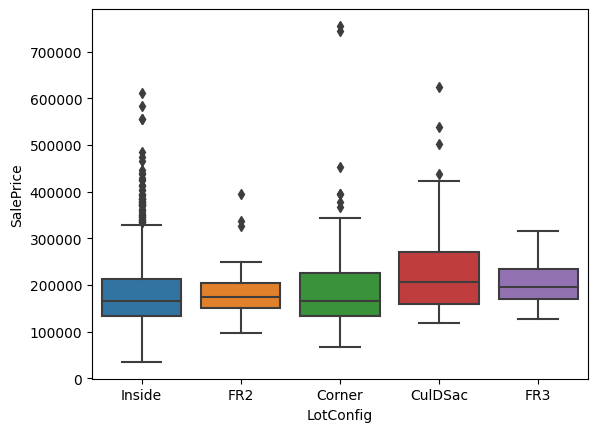

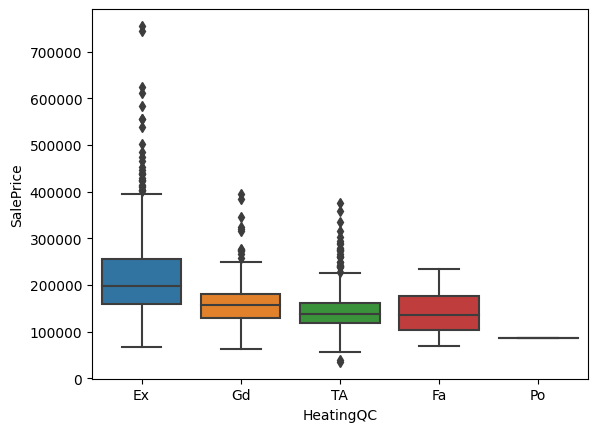

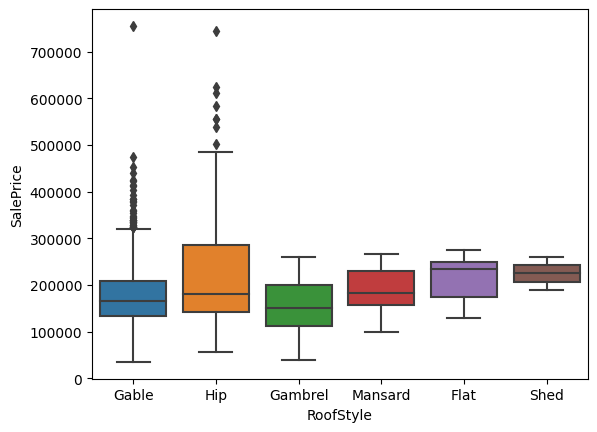

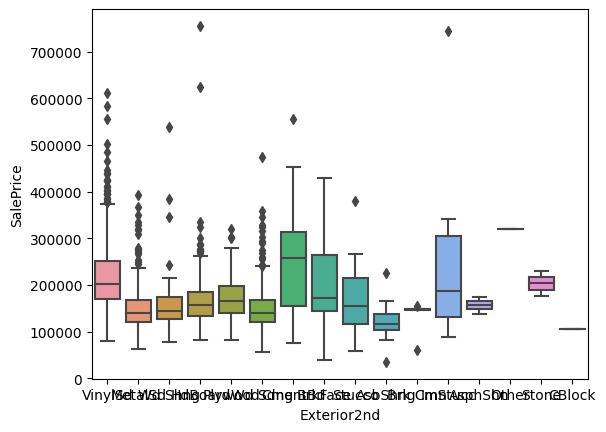

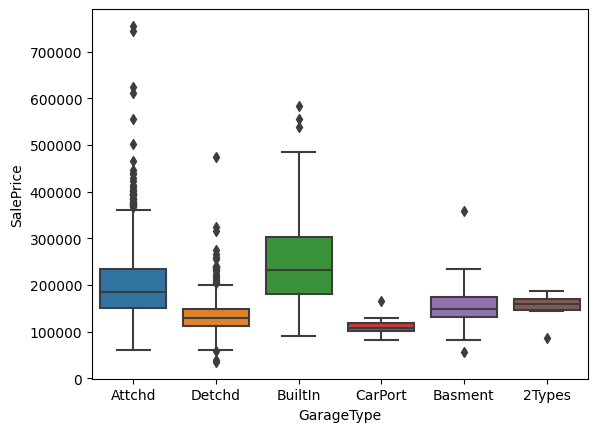

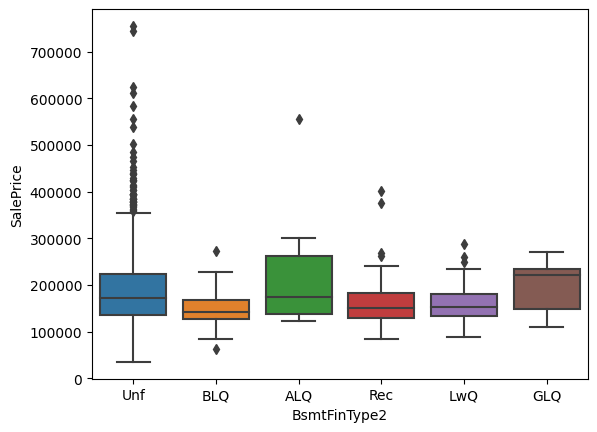

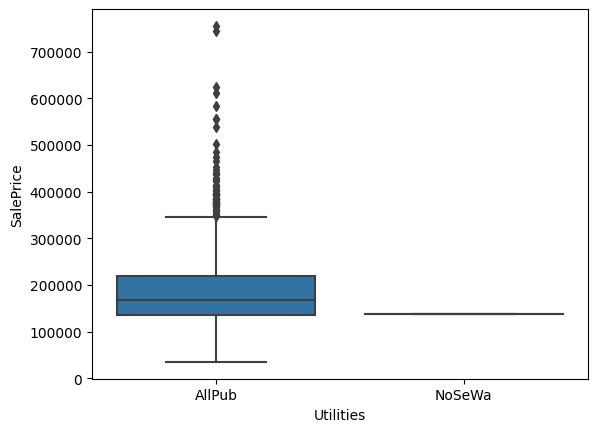

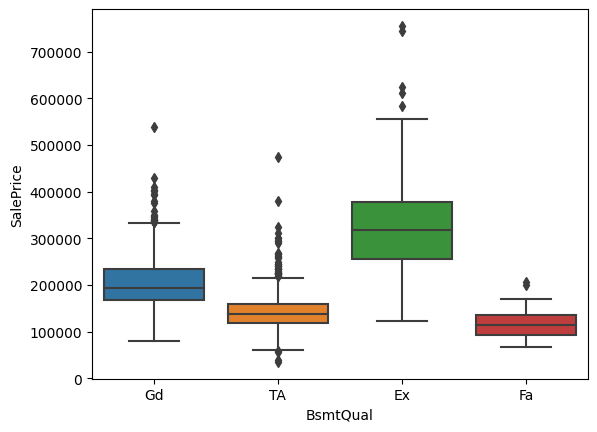

In [22]:
# Inspecting categorical columns
cols = df_cat.columns
for col in cols:
    if col != 'SalePrice':
        sns.boxplot(x=col,y='SalePrice',data=df_cat)
        plt.show()

In [23]:
# Getting dummies for categorical values
df_cat.drop('SalePrice', axis=1, inplace=True)
df_cat = pd.get_dummies(df_cat, columns = df_cat.columns, drop_first = True)
df_cat.head()

C:\Users\abhir\AppData\Local\Temp\ipykernel_18328\3747286231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('SalePrice', axis=1, inplace=True)


,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,CentralAir_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,...,GarageType_Detchd,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Utilities_NoSeWa,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [24]:
# Numerical binary encoding of boolean values
vmap = {True:1,False:0}
for col in df_cat.columns:
    df_cat[col] = df_cat[col].map(vmap)
df_cat.head()

,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,CentralAir_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,...,GarageType_Detchd,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Utilities_NoSeWa,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
df_encoded = pd.concat([df_num,df_cat], axis=1)
df_encoded.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType_Detchd,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Utilities_NoSeWa,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,0,1,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,1,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,0,1,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,1,0,0,0,0,1,0,0,0,1
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,0,1,0,0,1,0


In [26]:
scaler = MinMaxScaler()

In [27]:
# Train test split
df_train, df_test = train_test_split(df_encoded, train_size = 0.7, random_state = 100)
df_train.shape, df_test.shape

((936, 224), (402, 224))

In [28]:
cols_to_scale = df_num.columns
cols_to_scale

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
# Scaling numerical columns
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
# df_train[cols_to_scale].describe()
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [30]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((936, 223), (936,), (402, 223), (402,))

In [31]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [32]:
print(lm.intercept_)
print(lm.coef_)

55997597494.67277
[-2.03362141e-02  1.15399693e-01  6.84079368e-02  6.34840445e-02
  6.92566687e-02  4.58257555e-03  3.02828212e-02 -1.53524503e+10
 -1.00130583e+10 -1.58687274e+10  2.10247052e+10  1.49227561e+10
  1.12137887e+10  3.10619231e+09 -2.27859841e+10 -2.75818640e-03
 -1.94155433e-04  4.43555527e-03  6.48227587e-04 -4.75061350e-02
 -2.72044561e-02  2.94854188e-02  7.66438124e-03 -2.72970589e-02
 -1.23419967e-03  6.04697845e-02  8.81235904e-03 -1.21029115e-03
  9.21361956e-03  1.25409049e-02  6.21209112e-03  9.36524368e-02
 -3.48313285e-03 -1.97315216e-03 -2.35080719e-04  3.36289406e-03
  1.32541656e-02 -3.11744213e-03  2.42805481e-03  1.15156174e-02
 -3.56584787e-03  3.18695009e-02  2.94144601e-02  2.19781399e-02
  2.95389891e-02  2.61604786e-03 -3.66210938e-03  4.44406867e-02
  8.36944580e-03  5.16891479e-03 -1.54623985e-02 -2.04319954e-02
 -1.13649368e-02 -1.46061480e-02  3.22317674e+09 -3.74049544e-02
 -2.36897469e-02 -3.82270813e-02 -3.83892059e-02  6.19812012e-02
  4.907

In [33]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [34]:
metric = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train-y_pred_train))
print(rss_train_lr)
metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test-y_pred_test))
print(rss_test_lr)
metric.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

0.9311797133366201
-7.779922222990034e+20
0.7707858974548063
3.774998918373246e+21
0.028696501645365857
3064399545.27274


#### Ridge

In [35]:
params = {'alpha':[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,1,2,3,4,5,6,7,8,9,10,20,30,50,100,500,1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 0, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 30, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
model_cv.best_params_

{'alpha': 5}

In [37]:
ridge = Ridge(alpha=5)

ridge.fit(X_train,y_train)
print(ridge.intercept_)
print(ridge.coef_)

0.012569176339880195
[-0.02135992  0.02016434  0.06654907  0.03830723  0.01909135  0.01232171
  0.02902632  0.05644137  0.00799344  0.01033042  0.05281799  0.05835448
  0.07588457  0.00894143  0.07678128  0.00941095 -0.00289361  0.02579345
  0.0095351  -0.00232601 -0.01922138  0.0453247   0.02247464 -0.00591465
  0.01869746  0.0384043   0.01834998  0.00365549  0.00573784  0.00999834
  0.01445924  0.03729142  0.00152307 -0.00376444 -0.00040228  0.00396599
  0.01169507 -0.00210645  0.00414196  0.004283    0.00738812  0.00519354
  0.00173655  0.00675645  0.0009145   0.00236013  0.00702004  0.006436
 -0.00364016 -0.00128387 -0.01030768 -0.01552301 -0.00965933 -0.00179685
 -0.00157587 -0.00113775 -0.00928215 -0.02417958 -0.02896846  0.0120363
  0.00285146  0.00858026  0.00104683  0.01946285 -0.00373267  0.01450423
  0.00806967  0.00666949  0.00111491 -0.00512152 -0.02341788 -0.03327019
 -0.03398583 -0.00328707 -0.00129731  0.01106766  0.03013842 -0.00194402
 -0.00875593  0.00444373 -0.00973

In [38]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [39]:
metric_r = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric_r.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train-y_pred_train))
print(rss_train_lr)
metric_r.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test-y_pred_test))
print(rss_test_lr)
metric_r.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr**0.5)
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr**0.5)
metric_r.append(mse_test_lr**0.5)

0.9110094183100688
0.7762467183126378
0.9966928168783384
1.0857028799802417
0.03263192843022226
0.0519687736317365


In [40]:
params = {'alpha':[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,1,2,3,4,5,6,7,8,9,10,20,30,50,100,500,1000]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


C:\Users\abhir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\abhir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.813e-01, tolerance: 8.770e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 0, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 30, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
model_cv.best_params_

{'alpha': 0.0001}

In [42]:
lasso = Lasso(alpha=0.0001)

lasso.fit(X_train,y_train)
print(lasso.intercept_)
print(lasso.coef_)

-0.03187679362550824
[-2.69841255e-02  3.52856025e-02  8.80126069e-02  5.46938590e-02
  3.47628011e-02  7.35734924e-03  2.45549637e-02  5.83777947e-02
  4.42106352e-03 -0.00000000e+00  8.14505819e-02  0.00000000e+00
  5.63908731e-02 -0.00000000e+00  2.64560803e-01  4.95656473e-03
 -0.00000000e+00  4.26578199e-03 -0.00000000e+00 -1.05445800e-02
 -2.71994404e-02  1.68523753e-02  1.41540796e-02 -0.00000000e+00
  1.41693074e-03  5.38729882e-02  7.38300215e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.56789382e-03  6.68123182e-02
 -0.00000000e+00 -1.77292062e-03 -0.00000000e+00  1.91270743e-03
  7.58859905e-03 -2.37985160e-03  0.00000000e+00  3.61331123e-03
  5.58224670e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.26605791e-03  0.00000000e+00 -9.02001142e-03 -8.43896722e-03
 -8.02382035e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.08495826e-03 -2.75662214e-02 -2.89235132e-02  1.11547897e-02
  0.

In [43]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [44]:
metric_l = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric_l.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train-y_pred_train))
print(rss_train_lr)
metric_l.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test-y_pred_test))
print(rss_test_lr)
metric_l.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr**0.5)
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr**0.5)
metric_l.append(mse_test_lr**0.5)

0.9185498354637415
0.7453826834565581
0.9122402886375645
1.235462343968246
0.031218835548252773
0.055437256541574394


In [45]:
lr_table = {"Metric":["Train R2","Test R2","RSS Train","RSS Test","RMSE Train","RMSE Test"],
           "Linear Regression": metric}
df_res = pd.DataFrame(lr_table)

lr_ridge = pd.Series(metric_r, name='Ridge Regression')
lr_lasso = pd.Series(metric_l, name='Lasso Regression')

df_res = pd.concat([df_res,lr_ridge,lr_lasso],axis=1)
df_res

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,Train R2,9.311797e-01,0.911009,0.918550
1,Test R2,-7.779922e+20,0.776247,0.745383
2,RSS Train,7.707859e-01,0.996693,0.912240
3,RSS Test,3.774999e+21,1.085703,1.235462
4,RMSE Train,2.869650e-02,0.032632,0.031219
5,RMSE Test,3.064400e+09,0.051969,0.055437


In [46]:
betas = pd.DataFrame(index = X_train.columns)
betas.rows = X_train.columns

C:\Users\abhir\AppData\Local\Temp\ipykernel_18328\3133175166.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [47]:
betas['linear'] = lm.coef_
betas['ridge'] = ridge.coef_
betas['lasso'] = lasso.coef_

In [48]:
betas.sort_values(by='lasso',ascending=False)

,linear,ridge,lasso
GrLivArea,-2.278598e+10,0.076781,0.264561
OverallQual,6.840794e-02,0.066549,0.088013
RoofMatl_WdShngl,-3.694246e+08,0.048318,0.083728
TotalBsmtSF,2.102471e+10,0.052818,0.081451
PoolArea,9.365244e-02,0.037291,0.066812
BsmtFinSF1,-1.535245e+10,0.056441,0.058378
2ndFlrSF,1.121379e+10,0.075885,0.056391
OverallCond,6.348404e-02,0.038307,0.054694
GarageArea,6.046978e-02,0.038404,0.053873
Neighborhood_NoRidge,4.645467e-02,0.052436,0.051290
